In [1]:
try:
    import google.colab  # noqa: F401

    # specify the version of DataEval (==X.XX.X) for versions other than the latest
    %pip install -q dataeval
except Exception:
    pass

In [2]:
# Load the functions from DataEval that are helpful for bias
# as well as the VOCDetection dataset for the tutorial
from dataeval.metrics.bias import balance, diversity, parity
from dataeval.utils.data import Metadata
from dataeval.utils.data.datasets import VOCDetection

In [3]:
# Download the 2011 train dataset and verify the size of the loaded dataset
ds = VOCDetection(root="./data", download=True, image_set="train", year="2011")
len(ds)

5717

In [4]:
# Extract the Metadata from the dataset
metadata = Metadata(ds)

In [5]:
metadata.raw[0]

{'year': '2008',
 'image_id': '000008',
 'mask_path': '/dataeval/docs/source/tutorials/data/VOC2011/SegmentationClass/2008_000008.jpg',
 'folder': ['VOC2011', 'VOC2011'],
 'filename': ['2008_000008.jpg', '2008_000008.jpg'],
 'database': ['The VOC2008 Database', 'The VOC2008 Database'],
 'annotation_source': ['PASCAL VOC2008', 'PASCAL VOC2008'],
 'image_source': ['flickr', 'flickr'],
 'image_width': [500, 500],
 'image_height': [442, 442],
 'image_depth': [3, 3],
 'segmented': [0, 0],
 'pose': ['Left', 'Unspecified'],
 'truncated': [0, 1],
 'difficult': [0, 0]}

In [6]:
# Check the merged metadata structure
{k: v[0:2] for k, v in metadata.merged.items()}

{'year': [2008, 2008],
 'image_id': [8, 8],
 'mask_path': ['/dataeval/docs/source/tutorials/data/VOC2011/SegmentationClass/2008_000008.jpg',
  '/dataeval/docs/source/tutorials/data/VOC2011/SegmentationClass/2008_000008.jpg'],
 'folder': ['VOC2011', 'VOC2011'],
 'filename': ['2008_000008.jpg', '2008_000008.jpg'],
 'database': ['The VOC2008 Database', 'The VOC2008 Database'],
 'annotation_source': ['PASCAL VOC2008', 'PASCAL VOC2008'],
 'image_source': ['flickr', 'flickr'],
 'image_width': [500, 500],
 'image_height': [442, 442],
 'image_depth': [3, 3],
 'segmented': [0, 0],
 'pose': ['Left', 'Unspecified'],
 'truncated': [0, 1],
 'difficult': [0, 0],
 '_image_index': [0, 0]}

In [7]:
metadata.continuous_factor_bins = {"image_width": 5, "image_height": 5}
metadata.exclude = ["folder", "filename", "database", "annotation", "image", "depth", "name"]

In [8]:
bal = balance(metadata)

/dataeval/src/dataeval/utils/data/_metadata.py:334: UserWarning: A user defined binning was not provided for image_id. Using the uniform_width method to discretize the data. It is recommended that the user rerun and supply the desired bins using the continuous_factor_bins parameter.
  warnings.warn(


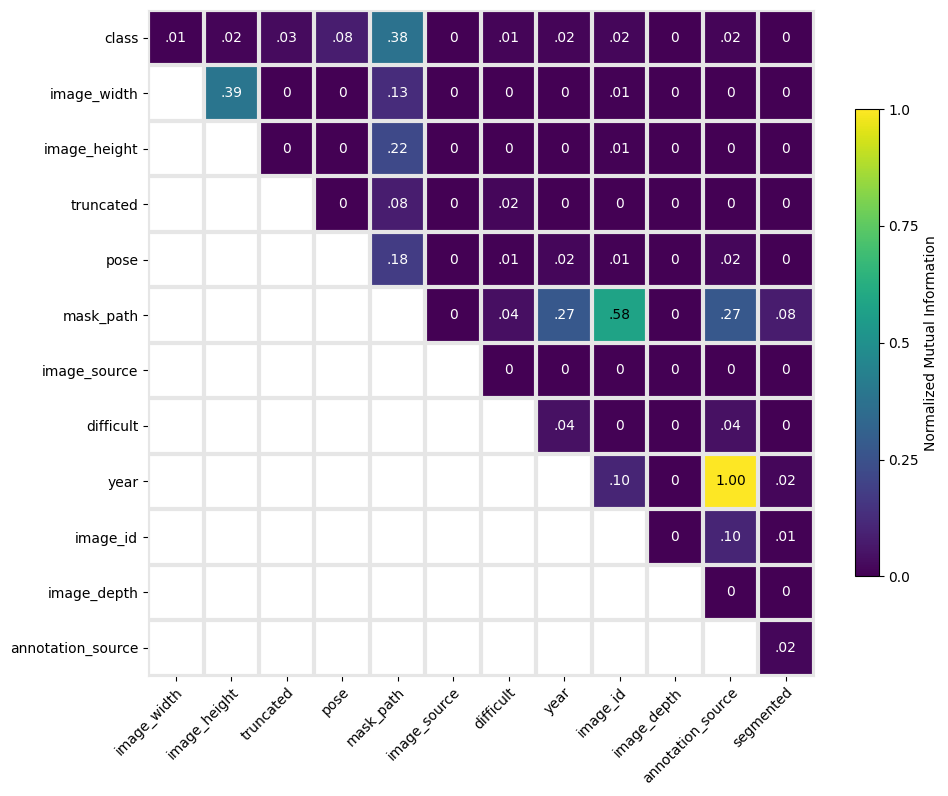

In [9]:
_ = bal.plot()

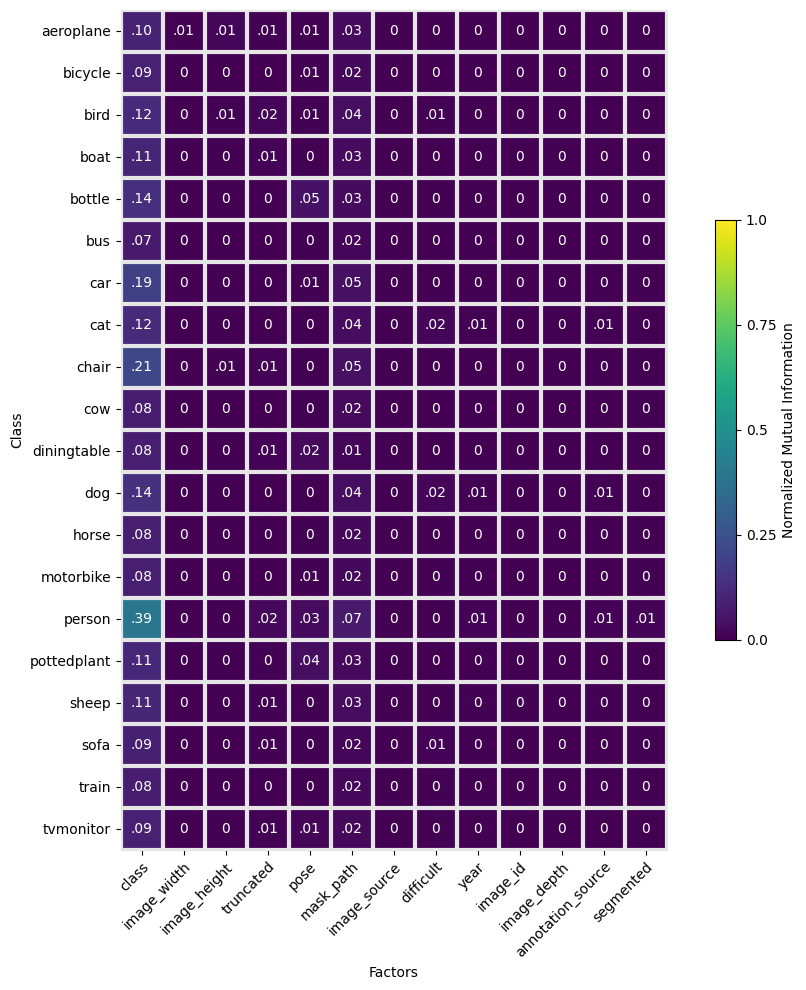

In [10]:
_ = bal.plot(plot_classwise=True)

In [11]:
div = diversity(metadata)

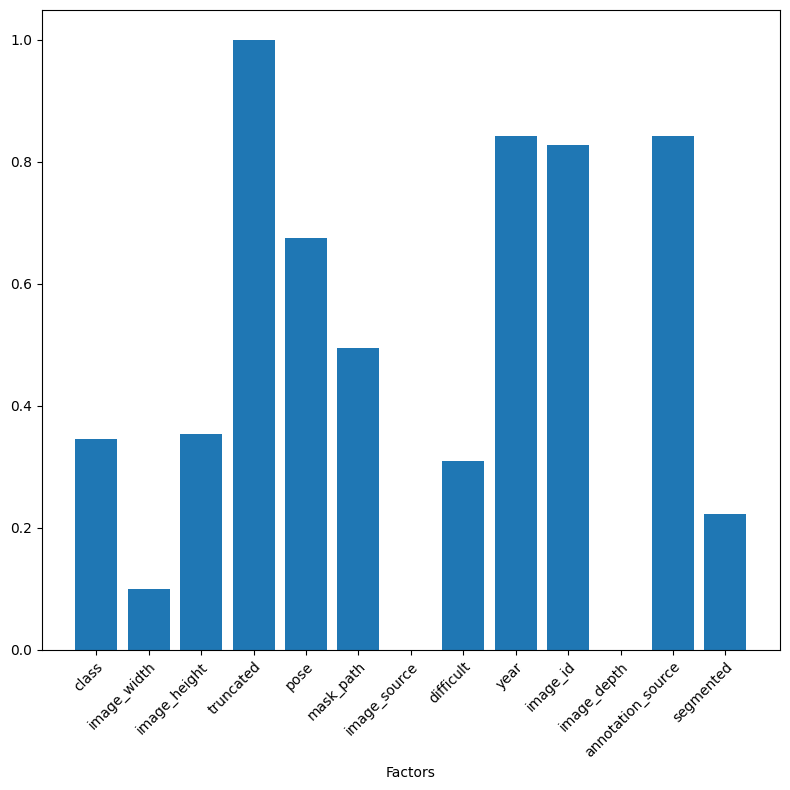

In [12]:
_ = div.plot()

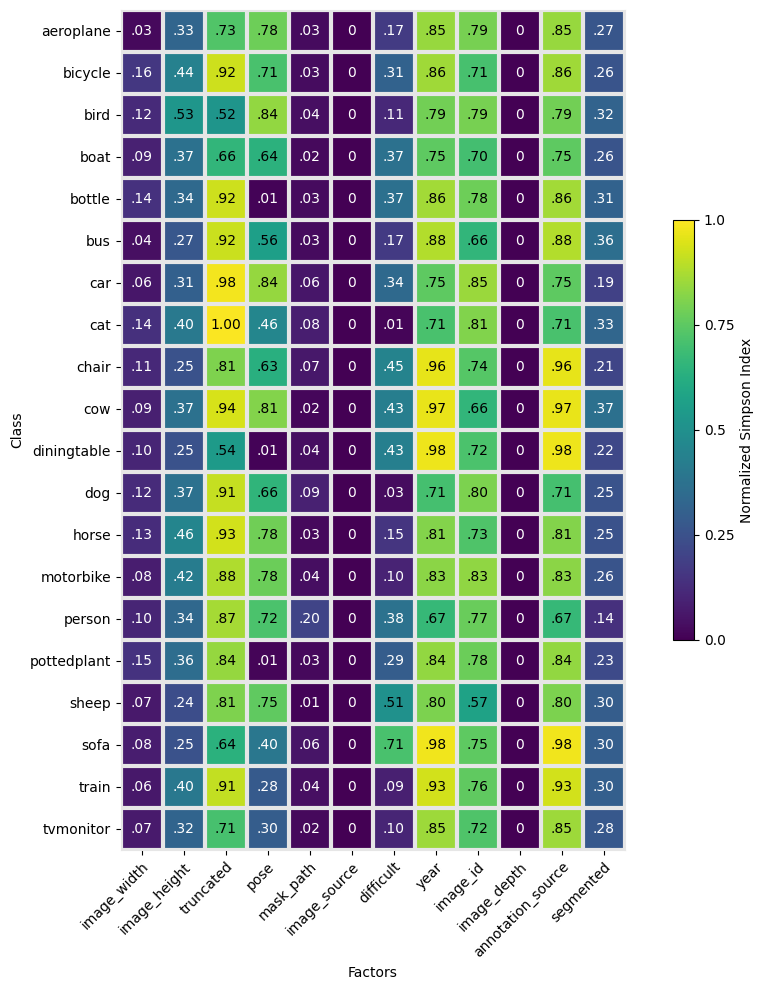

In [13]:
_ = div.plot(plot_classwise=True)

In [14]:
par = parity(metadata)

/dataeval/src/dataeval/metrics/bias/_parity.py:348: UserWarning: Some factors did not meet the recommended 5 occurrences for each value-label combination.
  warnings.warn("Some factors did not meet the recommended 5 occurrences for each value-label combination.")


In [15]:
par.to_dataframe()

,score,p-value
image_width,354.43,0.0
image_height,923.09,0.0
truncated,1413.02,0.0
pose,4732.10,0.0
mask_path,202582.33,0.0
image_source,0.00,1.0
difficult,529.53,0.0
year,990.93,0.0
image_id,1938.78,0.0
image_depth,0.00,1.0
